In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_saddle_points(A):
	for i in range(A.shape[0]):
		min_r = np.min(A[i])
		ind_r = 0
		max_c = 0
		ind_c = 0
		for j in range(A.shape[1]):
			if (A[i][j] == min_r):
				min_r = A[i][j]
				ind_r = j
				for k in range(A.shape[0]):
					if (A[k][ind_r] >= max_c):
						max_c = A[k][ind_r]
						ind_c = k
				if (min_r == max_c):
					return ind_c, ind_r
	return 0

def canonical_form(A):
	I = np.eye(A.shape[0])
	Z = np.zeros(A.shape[0])
	I = np.vstack((I, Z))
	B = np.array([-1] * A.shape[1])
	A = np.vstack((A, B))
	A = np.hstack((A, I))
	O = np.ones((A.shape[0], 1))
	A = np.hstack((O, A))
	A[-1][0] = 0
	return A

def select_lead_column(A):
	min_e = A[-1][1]
	index = 1
	for i in range(2, A.shape[1]):
		if ((min_e >= A[-1][i]) and (A[-1][i] < 0)):
			min_e = A[-1][i]
			index = i
	return index

def select_lead_row(A, col):
	for i in range(A.shape[0]):
		if (A[i][col] > 0):
			min_q = A[i][0] / A[i][col]
			index = i
			break
	for i in range(1, A.shape[0]-1):
		if (A[i][col] == 0): continue
		if ((min_q >= (A[i][0] / A[i][col])) and (A[i][col] > 0)):
			min_q = A[i][0] / A[i][col]
			index = i
	return index
		
def check_solved(A):
	solved = True 
	for j in range(1, A.shape[1]):
		if (A[-1][j] < 0):
			solved = False
	return solved

def conversion(A, c, r):
	main_e = A[r][c]
	for i in range(A.shape[1]):
		A[r][i] /= main_e
	for i in range(A.shape[0]):
		if (i != r):
			A[i] += (A[r] * A[i][c] * (-1))

def nash_equilibrium(A):
	P = []
	Q = [0] * A.shape[1]
	min_e = A.min()
	flag = 0
	if (min_e < 0):
		A += abs(min_e) + 1
		flag = 1
	I = find_saddle_points(A)
	if (I):
		F = 1 / A[I[0]][I[1]]
		for i in range(A.shape[0]):
			if i == I[0]:
				P.append(1)
			else:
				P.append(0)
		Q[I[1]] = 1
		print('Цена игры равна = ', F)
		print('Оптимальные стратегии первого игрока:', P)
		print('Оптимальные стратегии второго игрока:', Q)
		return F, P, Q
	else:
		f = A.shape[1]
		A = canonical_form(A)
		while (check_solved(A) == False):
			column = select_lead_column(A)
			row = select_lead_row(A, column)
			conversion(A, column, row)
		
		F = 1 / A[-1][0]
		for i in range(f+1, A.shape[1]):
			P.append(F * A[-1][i])
		for j in range(1, A.shape[1]-f):
			if (max(A[:,j]) == 1):
				i = np.where(A[:,j] == 1)
				Q.insert(j-1, F * A[int(i[0])][0])
				Q.pop(j)
		if (flag):
			F -= abs(min_e) + 1
		print('Цена игры равна = ', F)
		print('Оптимальные стратегии первого игрока:', P)
		print('Оптимальные стратегии второго игрока:', Q)
	return F, P, Q


def print_(S):
	fig = plt.figure()
	plt.title('Визуализация спектров оптимальных стратегий')
	plt.grid(True)
	p = np.arange(1, len(S)+1, 1)
	plt.stem(p, S, linefmt = 'red', markerfmt = 'o', use_line_collection = True)
	plt.show()

# Примеры

# 1. Спектр оптимальной стратегии состоит из одной точки

Цена игры равна =  0.3333333333333333
Оптимальные стратегии первого игрока: [0, 1]
Оптимальные стратегии второго игрока: [1, 0]


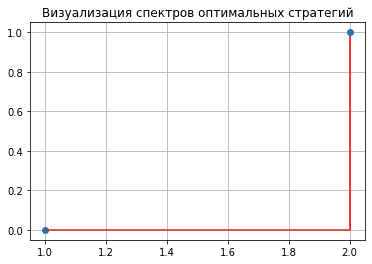

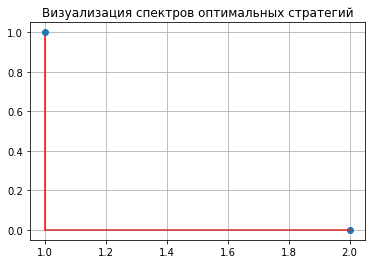

In [2]:
A = np.array([[1, 2],
             [3, 4]])
F, P, Q = nash_equilibrium(A)
print_(P)
print_(Q)

# 2. Спектр оптимальной стратегии неполон

Цена игры равна =  4.870967741935484
Оптимальные стратегии первого игрока: [0.0, 0.129032258064516, 0.09677419354838726, 0.43548387096774194, 0.3387096774193548, 0.0]
Оптимальные стратегии второго игрока: [0, 0, 0.6908602150537635, 0.14516129032258066, 0.1478494623655914, 0.01612903225806453]


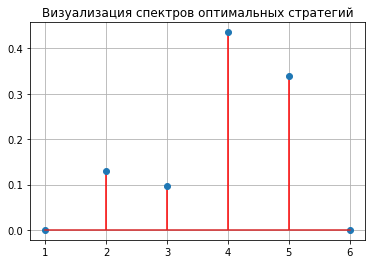

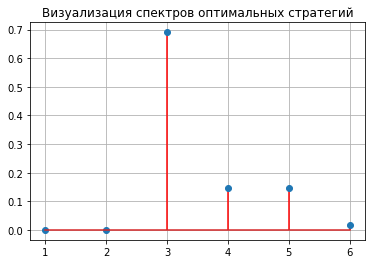

In [3]:
A = np.array([[4, 0, 6, 2, 2, 1],
	[3, 8, 4, 10, 4, 4],
	[1, 2, 6, 5, 0, 0],
	[6, 6, 4, 4, 10, 3],
	[10, 4, 6, 4, 0, 9],
	[10, 7, 0, 7, 9, 8]])

F, P, Q = nash_equilibrium(A)
print_(P)
print_(Q)

# 3. Спектр оптимальной стратегии полон

Цена игры равна =  1.5
Оптимальные стратегии первого игрока: [0.5, 0.5]
Оптимальные стратегии второго игрока: [0.5, 0.5]


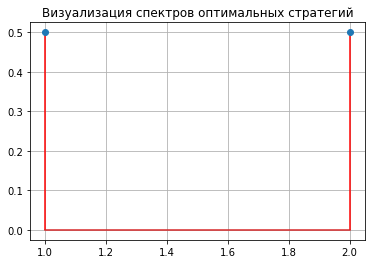

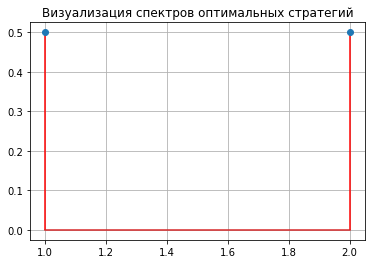

In [4]:
A = np.array([[1, 2],
             [2, 1]])
F, P, Q = nash_equilibrium(A)
print_(P)
print_(Q)